<a href="https://colab.research.google.com/github/Mtaimoorakmal/dataScience/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

to download dataset Uncomment the below code

In [4]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k


In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [6]:
# take a look at the dataset
df.head(1)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [7]:
#data size
df.shape

(1067, 13)

### Data Exploration
Let's first have a descriptive exploration on our data.

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [10]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [11]:
cdf.shape

(1067, 4)

We can plot each of these features:

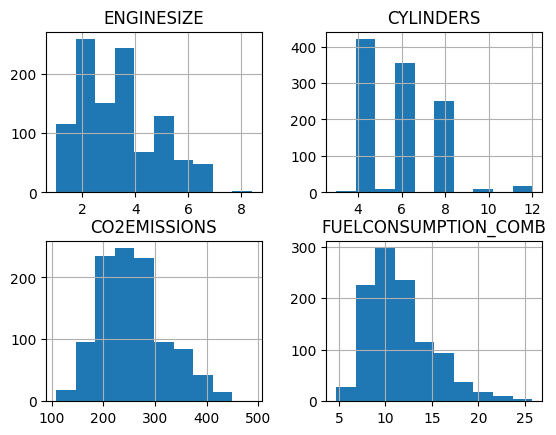

In [12]:
vis = cdf[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
vis.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


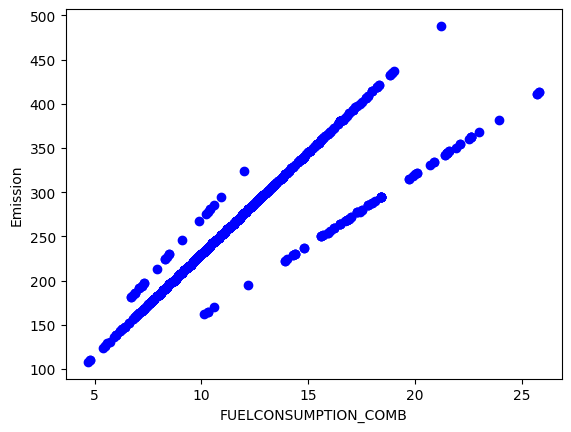

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

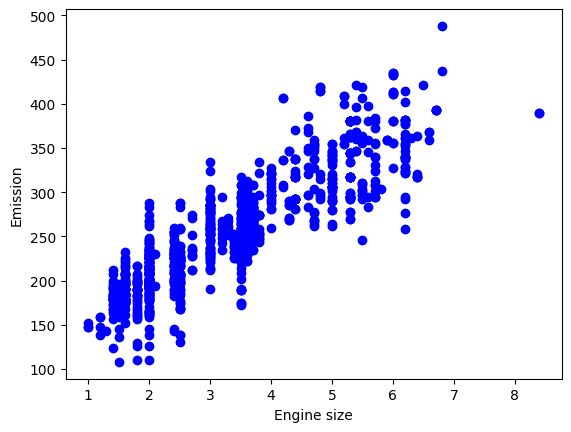

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

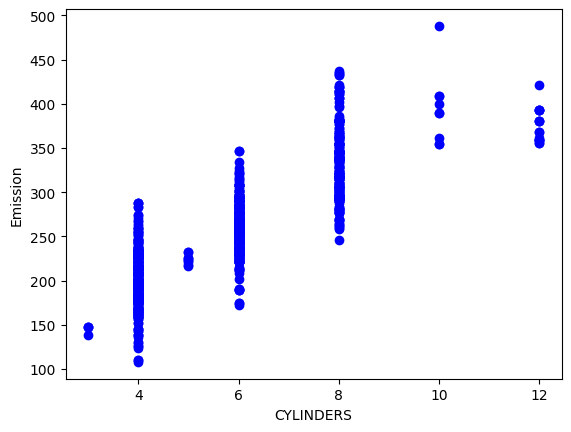

In [15]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function:

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [22]:
print(train.shape)
print(test.shape)

(861, 4)
(206, 4)


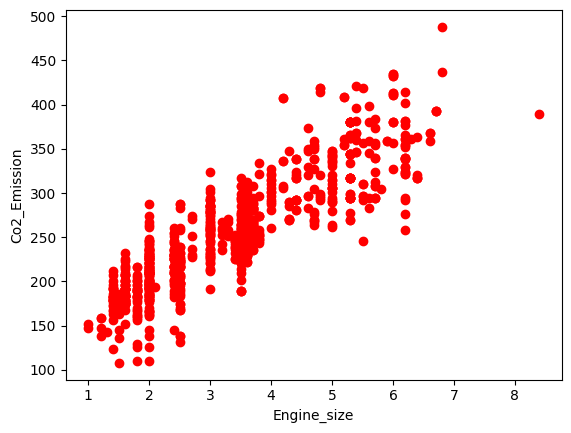

In [23]:
plt.scatter(train.ENGINESIZE ,train.CO2EMISSIONS, color = "red")
plt.xlabel("Engine_size")
plt.ylabel("Co2_Emission")
plt.show()

#### Train data distribution

#Modeling
using Sklearn pakage to =model the data

In [24]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

Train the model

In [27]:
regr.fit(train_x , train_y)

LinearRegression()

In [29]:
#the cofficients
print("Coefficients: " , regr.coef_)
print("intercept: " , regr.intercept_)

Coefficients:  [[39.14169514]]
intercept:  [124.99990003]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.<br>
these are  __Coefficient__ => __w__ and __Intercept__ => __b__ (in f(x) = xw+b)

#### Plot outputs


We can plot the fit line over the data:


In [41]:
#The predictd value is given by f(x) = wx+b
predicted_value = regr.coef_[0][0]*train_x +regr.intercept_[0]


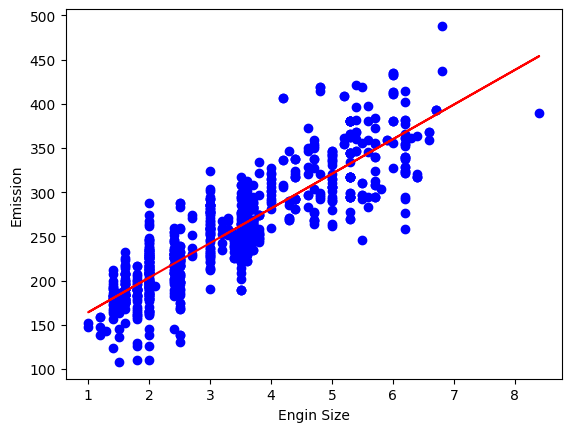

In [98]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS, color= 'blue')
plt.plot(train_x, predicted_value , '-r')
plt.xlabel("Engin Size")
plt.ylabel("Emission")
plt.show()


#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE).

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [51]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y= np.asanyarray(test[['CO2EMISSIONS']])
predicted_y = regr.predict(test_x)

In [56]:
#mean Absolute Error
MAE = np.mean(np.absolute(predicted_y - test_y))
#Mean Aquar Error
MSE = np.mean((predicted_y - test_y)**2)
#R2 _Score
R2_score = r2_score(test_y , predicted_y)


In [58]:
print(f"Mean Absolute Error : {MAE:.2f}")
print(f"Residual sum of Squares (MSE) : {MSE:.2f}")
print(f"R2-score : {R2_score:.2f}")

Mean Absolute Error : 22.73
Residual sum of Squares (MSE) : 945.35
R2-score : 0.76


#You can Check the singal values

In [110]:
print(test_x[0])
# print("full")
# print(test_x)
print(test_y[0])

[9.6]
[221]


In [111]:
new = regr.predict([test_x[0]])
print(new)


[[223.96516375]]


We can train the model with other features as well<br>
Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe

In [99]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

Train the model

In [100]:
regr.fit(train_x ,train_y)

LinearRegression()

Predict

In [102]:
predictions = regr.predict(test_x)

check by Evaluation matrics<br> mean absolute error

In [103]:
MAE = np.mean(np.absolute(predictions - test_y))
print(f"Mean Absolute Error : {MAE:.2f}")

Mean Absolute Error : 19.82


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`

In [112]:
print(test_x[10])
print(test_y[10])

[12.9]
[297]


In [113]:
new = regr.predict([test_x[10]])
print(new)


[[276.70274997]]
